# Exercício - Mini Projeto de Análise de Dados

Vamos fazer um exercício completo de pandas para um miniprojeto de análise de dados.

Esse exercício vai nos obrigar a usar boa parte dos conhecimentos de pandas e até dos outros módulos que já aprendemos ao longo do curso.

### O que temos?

Temos os dados de 2019 de uma empresa de prestação de serviços. 

- CadastroFuncionarios
- CadastroClientes
- BaseServiçosPrestados

Obs1: Para ler arquivos csv, temos o read_csv<br>
Obs2: Para ler arquivos xlsx (arquivos em excel normais, que não são padrão csv), temos o read_excel

### O que queremos saber/fazer?

1. Valor Total da Folha Salarial -> Qual foi o gasto total com salários de funcionários pela empresa? <br>
    Sugestão: calcule o salário total de cada funcionário, salário + benefícios + impostos, depois some todos os salários
    
    
2. Qual foi o faturamento da empresa?<br>
    Sugestão: calcule o faturamento total de cada serviço e depois some o faturamento de todos
    
    
3. Qual o % de funcionários que já fechou algum contrato?<br>
    Sugestão: na base de serviços temos o funcionário que fechou cada serviço. Mas nem todos os funcionários que a empresa tem já fecharam algum serviço.<br>
    . Na base de funcionários temos uma lista com todos os funcionários<br>
    . Queremos calcular Qtde_Funcionarios_Fecharam_Serviço / Qtde_Funcionários_Totais<br>
    . Para calcular a qtde de funcionários que fecharam algum serviço, use a base de serviços e conte quantos funcionários tem ali. Mas lembre-se, cada funcionário só pode ser contado uma única vez.<br><br>
    Dica: se você aplicar o método .unique() em uma variável que é apenas 1 coluna de um dataframe, ele vai excluir todos os valores duplicados daquela coluna.<br>
    Ex: unicos_colunaA = dataframe['colunaA'].unique() te dá como resposta uma lista com todos os itens da colunaA aparecendo uma única vez. Todos os valores repetidos da colunaA são excluidos da variável unicos_colunaA 
    
    
4. Calcule o total de contratos que cada área da empresa já fechou


5. Calcule o total de funcionários por área


6. Qual o ticket médio mensal (faturamento médio mensal) dos contratos?<br>
    Dica: .mean() calcula a média -> exemplo: media_colunaA = dataframe['colunaA'].mean()

Obs: Lembrando as opções mais usuais de encoding:<br>
encoding='latin1', encoding='ISO-8859-1', encoding='utf-8' ou então encoding='cp1252'

Observação Importante: Se o seu código der um erro na hora de importar os arquivos:<br>
- CadastroClientes.csv
- CadastroFuncionarios.csv

Use separador ";" (ponto e vírgula) para resolver

In [1]:
import pandas as pd

# Leitura dos arquivos CSV
cadastro_funcionarios_df = pd.read_csv(r'Base de Dados - Mini Projeto\CadastroFuncionarios.csv', sep=';', encoding='utf-8')
cadastro_clientes_df = pd.read_csv(r'Base de Dados - Mini Projeto\CadastroClientes.csv', sep=';', encoding='utf-8')
servicos_prestados_df = pd.read_excel(r'Base de Dados - Mini Projeto\BaseServiçosPrestados.xlsx')

# Exibição dos DataFrames
display(cadastro_funcionarios_df)
display(cadastro_clientes_df)
display(servicos_prestados_df)

,ID Funcionário,Estado Civil,Nome Completo,Salario Base,Impostos,Beneficios,VT,VR,Cargo,Area
0,1,C,Gabriel Mesquita,21910,10955,4382,242,"719,04",Diretor,Operações
1,2,C,João Haddad,5404,2702,"1080,8",154,"574,56",Estagiário,Logística
2,3,C,Amanda Marques Ribeiro,16066,8033,"3213,2",154,"729,12",Estagiário,Administrativo
3,4,C,Guilherme Nunez,21305,"10652,5",4261,220,"524,16",Analista,Administrativo
4,5,C,Adelino Gomes,5098,2549,"1019,6",176,"725,76",Analista,Administrativo
...,...,...,...,...,...,...,...,...,...,...
109,143,C,Renan Scharnhorst Ott,10793,"5396,5","2158,6",242,"514,08",Analista,Logística
110,144,S,Lucas Brum Pereira,4048,2024,"809,6",198,"796,32",Estagiário,Comercial
111,148,S,Caio Stellet,24596,12298,"4919,2",242,"561,12",Analista,Administrativo
112,149,C,Fernanda Rocha,5078,2539,"1015,6",308,"665,28",Estagiário,Comercial


,ID Cliente,Cliente,Valor Contrato Mensal
0,1,Teixeira Gonçalves,540
1,2,Souza Santos,1260
2,3,Emídio Alves,3195
3,4,Santos Costa,2520
4,5,Do Monteiro,3510
...,...,...,...
315,316,Manoel Costa,3690
316,317,Gomes Machado,2385
317,318,Alkindar Cardozo,3510
318,319,Pereira Fazenda,4185


,Codigo do Servico,ID Funcionário,ID Cliente,Tempo Total de Contrato (Meses)
0,OS0001,67,1,14
1,OS0002,17,2,12
2,OS0003,116,4,14
3,OS0004,37,5,8
4,OS0005,130,6,8
...,...,...,...,...
232,OS0233,111,315,4
233,OS0234,124,316,8
234,OS0235,72,317,6
235,OS0236,90,319,14


In [2]:
#Verificando as informações dos dataframes:
cadastro_funcionarios_df.info()
print()
cadastro_clientes_df.info()
print()
servicos_prestados_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID Funcionário  114 non-null    int64 
 1   Estado Civil    114 non-null    object
 2   Nome Completo   114 non-null    object
 3   Salario Base    114 non-null    int64 
 4   Impostos        114 non-null    object
 5   Beneficios      114 non-null    object
 6   VT              114 non-null    int64 
 7   VR              114 non-null    object
 8   Cargo           114 non-null    object
 9   Area            114 non-null    object
dtypes: int64(3), object(7)
memory usage: 9.0+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   ID Cliente             320 non-null    int64 
 1   Cliente                320 non-null    object
 2   Val

Valor Total da Folha Salarial:

In [3]:
def formatar_numeros_float(dataframe, coluna):
    for i, valor_linha in enumerate(dataframe[coluna]):
        dataframe.loc[i, coluna] = float(valor_linha.replace(",", ".").replace(" ", ""))
    return dataframe

for coluna in ['Impostos', 'Beneficios']:
    cadastro_funcionarios_df = formatar_numeros_float(cadastro_funcionarios_df, coluna)

In [4]:
valor_folha = cadastro_funcionarios_df['Salario Base'].sum() + cadastro_funcionarios_df['Impostos'].sum() + cadastro_funcionarios_df['Beneficios'].sum()

print(f'O gasto total com o salário dos funcionários da empresa foi de R$ {valor_folha:,.2f}')

O gasto total com o salário dos funcionários da empresa foi de R$ 2,614,343.30


Faturamento da Empresa:

In [8]:
# Merge dos DataFrames
faturamento_df = cadastro_clientes_df.merge(servicos_prestados_df, on='ID Cliente').drop(['Cliente','Codigo do Servico','ID Funcionário'], axis = 1)
display(faturamento_df)

valor_faturamento = 0

for i in range(len(faturamento_df)):
    valor_faturamento += faturamento_df.loc[i, 'Valor Contrato Mensal'] * faturamento_df.loc[i, 'Tempo Total de Contrato (Meses)']

print(f'O faturamento total total da empresa foi de R$ {valor_faturamento:,.2f}')

,ID Cliente,Valor Contrato Mensal,Tempo Total de Contrato (Meses)
0,1,540,14
1,2,1260,12
2,4,2520,14
3,5,3510,8
4,6,2340,8
...,...,...,...
232,315,1575,4
233,316,3690,8
234,317,2385,6
235,319,4185,14


O faturamento total total da empresa foi de R$ 5,519,160.00


% de funcionários que já fechou algum contrato:

In [12]:
funcionarios_contratos = len(servicos_prestados_df['ID Funcionário'].unique())/len(cadastro_funcionarios_df['ID Funcionário'])

print(f'{funcionarios_contratos:.2%} dos funcionários já fecharam algum contrato.')

86.84% dos funcionários já fecharam algum contrato.


Contratos por área da empresa:

Administrativo    63
Operações         48
Comercial         44
Financeiro        42
Logística         40
Name: Area, dtype: int64

<AxesSubplot:>

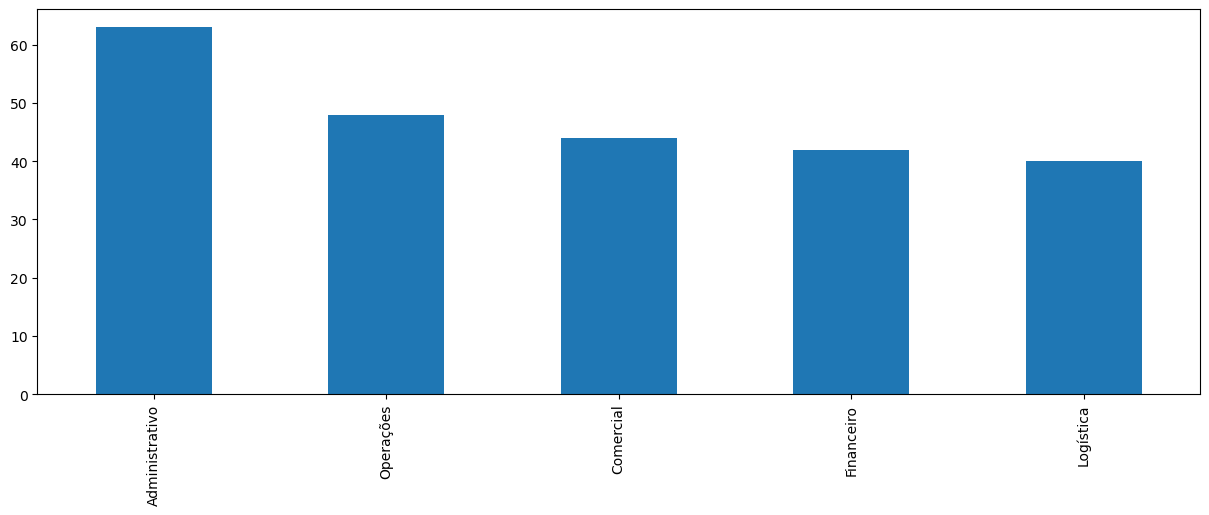

In [19]:
contratos_area_df = cadastro_funcionarios_df[['ID Funcionário', 'Area']].merge(servicos_prestados_df[['Codigo do Servico', 'ID Funcionário']], on='ID Funcionário')

contratos_area = contratos_area_df['Area'].value_counts()
display(contratos_area)
contratos_area.plot(figsize=(15, 5), kind='bar')

Total de funcionários por área:

In [21]:
cadastro_funcionarios_df['Area'].value_counts()

Administrativo    26
Comercial         26
Operações         23
Logística         21
Financeiro        18
Name: Area, dtype: int64

Ticket médio mensal (faturamento médio mensal) dos contratos:

In [24]:
ticket_medio = cadastro_clientes_df['Valor Contrato Mensal'].mean()

print(f'O ticket médio mensal da empresa é de R$ {ticket_medio:,.2f}')



O ticket médio mensal da empresa é de R$ 2,502.56
